# Food or Fuel?

### CSB 2018 Final Project 
### by: Chris Lee

## Background:

During undergrad, I worked in a research lab that was part of the Food and Fuel for the 21st Century Initiative, A UC San Diego Organized Research Unit that focuses on the development of sustainable and commercially viable solutions for the renewable production of food, energy, green chemistry and bio-products using photosynthetic organisms such as algae. 

## Why Algae?

Algae are efficient organisms that grow quickly, need relatively low-nutrient inputs, and get their energy from sunlight to  produce proteins and lipids that can be used to for bio products and biofuels. Algae can thrive in saltwater and even wastewater, so large-scale algae production systems do not compete with industries like agriculture for resources such as arable land and fresh water (currently a particularly strained resource in California).

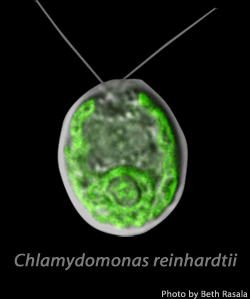


## More Background

In the pursuit of working to develop algae as a commercially viable feedstock for biofuels, green chemicals, nutraceuticals, animal feeds, and other high value bio-products, there arose a need to rapidly screen and identify the components of many different strains/samples of algae to find whether or not they were viable for large scale production of the aforementioned products. For example, a strain of algae high in carbohydrates but low in lipid would be viable as animal feed (Food) while a strain high in lipid but low in carbohydrates would be ideal as for biofuel production (Fuel).

My lab was interested in utilizing FTIR (Fourier-transform infrared spectroscopy) to quickly, albeit roughtly, deconvolute and screen these many algal strains/samples based on their composition. (Hence, the title Food or Fuel?) FTIR Analysis is an infrared spectroscopy method used to identify materials. Since different functional groups absorb infrared light at different and distinct frequencies, FTIR analysis can scan and provide a picture of the chemical composition/properties of a sample.  

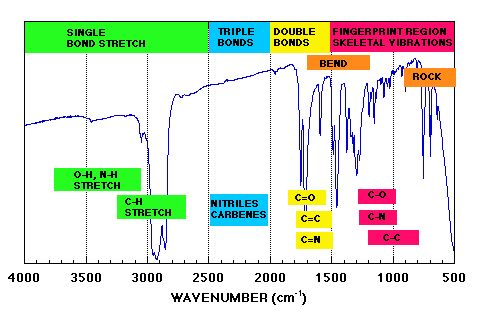

Furthermore, Beer's law (A = e L c), states that spectroscopic absorbance is directly related to a substance specific coefficient, an instrument specific path length of light, and the concentration of the substance being analyzed. In other words there is a direct linear relationship between the strength of a sample's FTIR absorbance signal and the amount of functional groups in that sample. This proportional relationship can be quantified by finding the area under the curve of a functional group's corresponding signal. 

Thus, we can find the amount of lipid in a given algae strain/sample by quantifying the C=O carbonyl group signal around ~1700cm-1 using FTIR

### Lipid Structure:

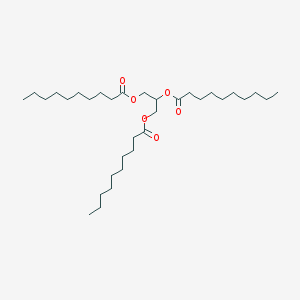

Similarly, we can find the amount of carbohydrate by quantifying the O-H group signal around 3300cm-1.

### Carbohydrate Structure:
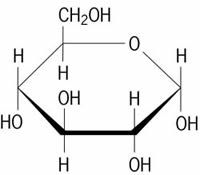

Comparing the sample value of carbohydrate to the sample value of lipids can give us a clue as to whether or not the sample is more suited for Food or Fuel. Furthermore, comparing these sample area under the curve (AUC) values to the AUC value of exemplars (pure dextrose for carbohydrates or pure tricaprin for lipids) can give an idea of how "pure" the algae is for lipid or carbohydrate given that the same amount of sample is compared against the same amount of exemplar. Finding the ratio of sample/exemplar can give an idea of what proportion of the algal sample is carbohydrate or lipid and whether it is high enough for this algae strain to be worth expanding at a larger scale.

It is important to note that this FTIR deconvolution method doesn't take into account the signals from other algal components such as proteins, nucleic acids, chlorophylls, etc. However, high levels of accuracy and precision aren't the goal of this analysis since its purpose is to act as a quick and dirty initial viability screening method. 

### The Problem:

Although this method was faster than wet lab quantification techniques such as the Bligh and Dyer total lipid extraction method, it still involved running each sample and looking at each FTIR plot to see if the peaks looked promising. 

Moreover, if the strain looked interesting, I then had to open the numerical data in Excel, manually isolate (i.e. a lot of scrolling and then cutting and pasting) the absorbance data of the important peaks (around 1700cm-1 or 3300cm-1), and then perform calculations to get the area under the curve values for comparisons/analysis.

### My Project

Since my problem requires mathematical operations, for my CSB final project, I will create an R program that will automate the tasks I had to do in undergrad. The program will consist of several parts. First, the program that will take sample data and graph it out. Second, the program will isolate the peaks of the sample data around the carbohydrate and lipid signal. Third, the program will perform quantification to turn the signals into Area under the Curve (AUC) values. Finally, the program will then compare the sample data to exemplar data to give a rough view of the sample composition and return whether of not the sample is suited for biofuel, animal feed, or neither.

### Graphing Sample Data

In [ ]:
#Load the tidyverse library for better organizatin of data.

library(tidyverse) 

#Load the sample data, remember to set working directory to the CSB 2018 Final Project folder.

AlgaeSample1<-read_csv("AlgaeSample1.csv")

#check to see what the data Algae sample looks like, for example:

head(AlgaeSample1)
# A tibble: 6 x 2
  `PE IR       SPECTRUM    SPECTRUM    ASCII       PEDS        1.60`    X2
                                                               <chr> <dbl>
1                                                                 -1    NA
2                                                       SPIKED~1.ASC    NA
3                                                           15/01/10    NA
4                                                            16:34.0    NA
5                                                           15/01/10    NA
6                                                            16:34.0    NA
tail(AlgaeSample1)
# A tibble: 6 x 2
  `PE IR       SPECTRUM    SPECTRUM    ASCII       PEDS        1.60`       X2
                                                               <chr>    <dbl>
1                                                             1002.5 0.074393
2                                                               1002 0.073682
3                                                             1001.5 0.073285
4                                                               1001 0.073566
5                                                             1000.5 0.073801
6                                                               1000 0.073784

#It seems like the head of the data includes instrument settings and the tail of the data ends at row 6056

#A quick look at the data shows that the actual data doesnt start until row 56.

View(AlgaeSample1)

#We want to get the data without the instrument settings so we can write a function: 

graph_sample_data <- function (sampledata) {
  #slice/isolate the data we want
  sliced <- slice(sampledata, 56:6056)
  #rename the columns, this is instrument specific so different instruments may need different renaming protocols
  slicedrenamed <- sliced %>% rename(Wavenumbers = 'PE IR       SPECTRUM    SPECTRUM    ASCII       PEDS        1.60', 
                                     Absorbance = X2 )
  #plot the data, and add tick marks on the x axis
  thespectra <-ggplot(data= slicedrenamed, aes(x=Wavenumbers, y = Absorbance, group = 1)) + 
    geom_line() + scale_x_discrete(breaks = c(1500,2000, 2500,3000, 3500), labels = c(1500, 2000, 2500,3000, 3500))
  return(thespectra)
}

#Now that the function is created, we can load any sample data to visualize the graphs, for example:
graph_sample_data(AlgaeSample1) #see below
#If desired, we can also save the graphs using the command: ggsave(file = "insertgraphnamehere.pdf")

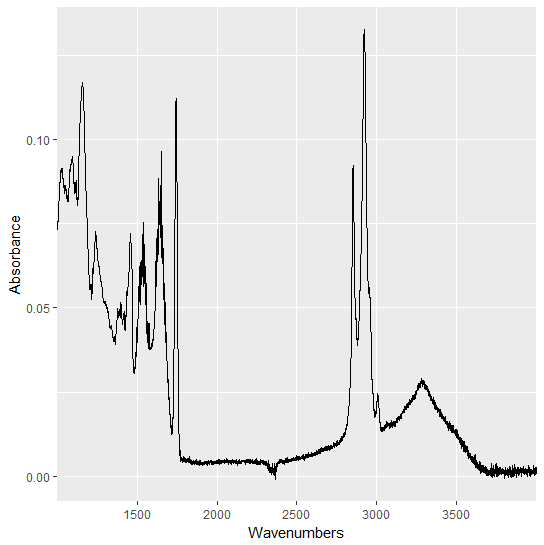

### Isolate Carbonyl Peak from a Sample

In [ ]:
#To setup the same global environment:

#Load the tidyverse library for better organizatin of data.
library(tidyverse) 

#Load the sample data
AlgaeSample1<-read_csv("AlgaeSample1.csv")

get_carbonyl_signal <- function (sampledata) {
  #once again, we're going to separate the data from the instrument settings
  
  sliced <- slice(sampledata, 56:6056)
  
  #rename the columns
  renamed <- sliced %>% rename(Wavenumbers = 'PE IR       SPECTRUM    SPECTRUM    ASCII       PEDS        1.60',
                               Absorbance = X2 )
  #slice/isolate the data we want
  
  #now, we're going to slice/isolate the data we want corresponding to lipids/carbonyls
  
  #the carbonyl/lipid signal we want will be around wavenumber 1700 +/-50.
  #first we're going to use the which function to find the indices we want from our data
  lip_upper <-which (renamed ==1750)
  lip_lower <-which (renamed ==1650)
    
  #then, we're going to slice the data we want using these indices
  lipid_signal <- slice(renamed, lip_upper:lip_lower)
  return (lipid_signal) 
}
#now that the function is created, we can insert any sample data and then save it as data, for example:
carbonyl_signal_1<-get_carbonyl_signal(AlgaeSample1)
> carbonyl_signal_1
# A tibble: 201 x 2
   Wavenumbers Absorbance
         <chr>      <dbl>
 1        1750   0.082228
 2      1749.5   0.086269
 3        1749   0.088357
 4      1748.5   0.091185
 5        1748   0.097105
 6      1747.5   0.101281
 7        1747   0.103529
 8      1746.5   0.106368
 9        1746   0.108724
10      1745.5   0.111024
# ... with 191 more rows

### Isolate OH Peak from a Sample

In [ ]:
#This section directly follows from the previous sectios: the get_carbonyl_signal function
#it assumes that the global environment contains the tidyverse library and AlgaeSample data

get_OH_signal <- function (sampledata) {
  #once again, we're going to separate the data from the instrument settings
  
  sliced <- slice(sampledata, 56:6056)
  
  #rename the columns
  renamed <- sliced %>% rename(Wavenumbers = 'PE IR       SPECTRUM    SPECTRUM    ASCII       PEDS        1.60',
                               Absorbance = X2 )
  
  #now, we're going to do the same thing we did with the carbonyl signal
  
  #the -OH signal is broad so we'll want wavenumbers 3300 +/-100
  
  carbohydrate_upper <-which (renamed ==3400)
  carbohydrate_lower <-which (renamed ==3200)
  carbohydrate_signal <- slice(renamed, carbohydrate_upper:carbohydrate_lower)
  return (carbohydrate_signal) 
}
#now that the function is created, we can insert any sample data and then save it as data, for example:
OH_signal_1<-get_OH_signal(AlgaeSample1)
> OH_signal_1
# A tibble: 401 x 2
   Wavenumbers Absorbance
         <chr>      <dbl>
 1        3400   0.019584
 2      3399.5   0.018523
 3        3399   0.018302
 4      3398.5   0.018689
 5        3398   0.018656
 6      3397.5   0.018207
 7        3397   0.018024
 8      3396.5   0.018413
 9        3396   0.018361
10      3395.5   0.017863
# ... with 391 more rows

### Get Area Under the Curve of Samples

In [ ]:
#this portion of the code directly follows from the previous 2 sections: the get_carbonyl_signal and get_OH_signal functions
#it assumes that the global environment contains the carbonyl and OH signal data

#for this part, we'll need the package zoo so we'll need to install and load it
install.packages("zoo")
#if zoo is already installed, we just need to load the library
library(zoo)

get_AUC <- function(carbonyl, OH){
  #separate Wavenumber and Absorbance values of the signal data
  wave_carbonyl <-select (carbonyl, Wavenumbers)
  absorb_carbonyl <- select (carbonyl, Absorbance)
  wave_OH <-select (OH, Wavenumbers)
  absorb_OH <-select (OH, Absorbance)
  
  #we're going to use the rollmean function from the zoo library to approximate Area under the Curve (AUC)
  #the rollmean function integrates the area under a curve baed on the trapezoidal rule  
  #it's important to note that rollmean requires vectors so we'll be using the pull function to get a vector from the tbls
    
  carbvecX <- as.numeric(pull(wave_carbonyl)) #getting vectors from tbl
  carbvecY <- as.numeric(pull(absorb_carbonyl)) #getting vectors from tbl
  carbid <- order(carbvecX) #providing indices for the rollmean function
  AUC_carbonyl <- sum(diff(carbvecX[carbid])*rollmean(carbvecY[carbid],2))    #rollmean function giving AUC
  
  OHvecX <- as.numeric(pull(wave_OH)) #getting vectors from tbl
  OHvecY <- as.numeric(pull(absorb_OH)) #getting vectors from tbl
  OHid <- order(OHvecX) #providing indices for the rollmean function
  AUC_OH <- sum(diff(OHvecX[OHid])*rollmean(OHvecY[OHid],2))   #rollmean function giving AUC
  
  areas_carb_and_OH <-c(AUC_carbonyl, AUC_OH) #concatenate the two AUC values
  
  print(paste("The AUC for carbonyl is", AUC_carbonyl)) #print the results
  print(paste("The AUC for OH is", AUC_OH)) #print the results
  
  return(areas_carb_and_OH) #return the concatenated AUC values
}

#once the function is loaded, we can run it with our carbonyl and OH signal data from any sample and save the output
#for example:
sampleAUC <-get_AUC(carbonyl_signal_1, OH_signal_1)
[1] "The AUC for carbonyl is 4.65870975"
[1] "The AUC for OH is 4.75701275"

### Load Exemplars

In [ ]:
#remember to set directory to project file
#remember to have tidyverse loaded for organization of data
library(tidyverse) 

#Now that we have AUC values for carbonyl and OH peaks, we need to give meaning to them by providing context using exemplars
#As mentioned above, the exemplar for lipid/carbonyl will be tricaprin while the exemplar for carbohydrates will be dextrose.
#Unlike above, where the code/functions were purposefully made so that any sample could be inputted into the functions,
    #the exemplars serve as a control to all samples and are not replaced between samples.
#Hence, a script is used to upload them.

tidyexemplars<-read_csv("exemplars in csv.csv") #load exemplar data for lipid (tricaprin), and carbohydrate (dextrose)
head(tidyexemplars) #check to see if upload worked

#separate the exemplar data from each other and check to see if separation worked
trisig <- select(tidyexemplars, Tri, TriSig)
head(trisig)
dexsig <- select(tidyexemplars, Dex, DexSig)
head(dexsig)

#now that we have this data, we can graph it to see what the exemplars look like on FTIR
#plot the data, and add tick marks on the x axis
#tricaprin plot
ggplot(data= trisig, aes(x=Tri, y = TriSig, group = 1)) + geom_line() 
#dextrose plot
ggplot(data= dexsig, aes(x=Dex, y = DexSig, group = 1)) + geom_line() 

#We can check to see that, indeed, the Dextrose exemplar has a large,broad peak around wavenumber 3300
#and the Tricaprin exemplar does indeed have a narrow but very high peak around wavenumber 1700



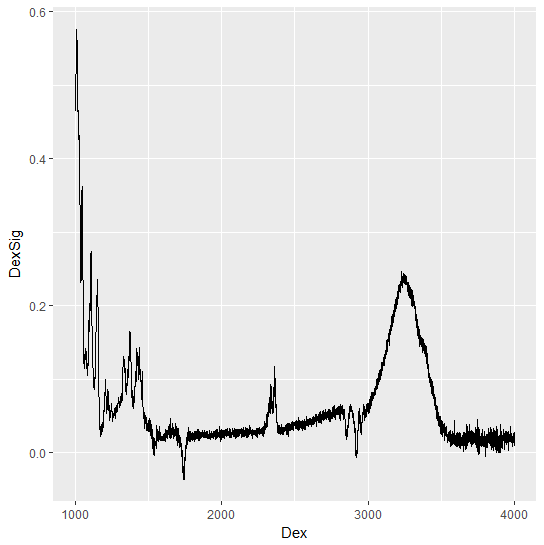

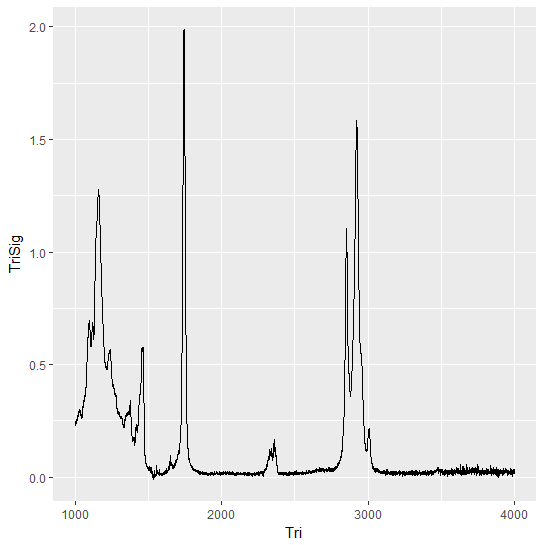

In [ ]:
#after we've confirmed that the exemplars are in order, we extract the carbonyl signal of the tricaprin 
#and the OH signal of the dextrose in a similar way as we did for our sample(s)

tri_upper <-which (trisig ==1750)
tri_lower <-which (trisig ==1650)
tri_signal <- slice(trisig, tri_upper:tri_lower)

dex_upper <-which (dexsig ==3400)
dex_lower <-which (dexsig ==3200)
dex_signal <- slice(dexsig, dex_upper:dex_lower)

#finally, we calculate the AUC of the exemplars

wave_tri <-select (tri_signal, Tri)
absorb_tri <- select (tri_signal, TriSig)
wave_dex <-select (dex_signal, Dex)
absorb_dex <-select (dex_signal, DexSig)

#we're going to use the rollmean function again to calculate AUC so make sure the zoo library is loaded
#and, once again, we're using the pull function to get a vector from the tbls

trivecX <- as.numeric(pull(wave_tri)) #getting vectors from tbl
trivecY <- as.numeric(pull(absorb_tri)) #getting vectors from tbl
tri_id <- order(trivecX) #providing indices for the rollmean function
AUC_tri <- sum(diff(trivecX[tri_id])*rollmean(trivecY[tri_id],2))    #rollmean function giving AUC

dexvecX <- as.numeric(pull(wave_dex)) #getting vectors from tbl
dexvecY <- as.numeric(pull(absorb_dex)) #getting vectors from tbl
dex_id <- order(dexvecX) #providing indices for the rollmean function
AUC_dex <- sum(diff(dexvecX[dex_id])*rollmean(dexvecY[dex_id],2))   #rollmean function giving AUC

#view the AUC values
AUC_dex
AUC_tri

#results of AlgaeSample1
> AUC_dex
[1] 39.19067
> AUC_tri
[1] 39.23521


### Get AUC Ratio (Sample vs. Exemplar)

In [ ]:
#finally, we can evaluate the contets of our samples by finding the ratio of the sample AUCs to exemplar AUCs
#make sure sampleAUC (genarated by get_AUC function from the Get AUC of Samples section) exists in the global environment

get_ratio <- function(sampleAUC, AUC_dex, AUC_tri){
  #separate sample carbonyl AUC from sample OH AUC
  sample_carbonyl_AUC <-sampleAUC[1]
  sample_OH_AUC <- sampleAUC[2]
  #calculate the ratio of sample to exemplar
  carbonyl_ratio <-sample_carbonyl_AUC/AUC_tri
  OH_ratio <- sample_OH_AUC/AUC_dex
  
  print(paste("The AUC ratio for carbonyl is", carbonyl_ratio)) #print the results
  print(paste("The AUC ratio for OH is", OH_ratio)) #print the results
}

#once the funtion above is loaded, run it with the data. For example:
get_ratio(sampleAUC, AUC_dex, AUC_tri)

#The result of evaluating AlgaeSample1
[1] "The AUC ratio for carbonyl is 0.118737991891594"
[1] "The AUC ratio for OH is 0.121381256048952"

#This shows that this sample of algae is roughly 10% carbohydrate and lipid. It seems to make
#an equally good/bad source of food food or fuel.

### Conclusions

Although this R program could have been written down as one large program, it was broken down into different smaller components in order to make programming (and catching the errors of) each individual part of it easier. Hopefully, it also makes for easier grading. Finally, I conlcude that using this Food or Fuel R program pipeline would have made my undergrad experience with algae a lot less tedious.